<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/storage_routing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo



In [ ]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
from matplotlib.patches import Rectangle
from google.colab import files

import matplotlib.patches as patches

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
KOLORS = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
            "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
            "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
            "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
            "#8c6d31", "#9c9ede", "#637939", "#e7cb94", "#b5cf6b",
            "#cedb9c", "#c7c7c7", "#bd9e39", "#e7969c", "#7b4173"]

def rects():
  rectangle1 = patches.Rectangle((1.1, 0), 0.8, 9.1, edgecolor='k', facecolor='grey', alpha=0.5)
  rectangle2 = patches.Rectangle((4.1, 0), 0.8, 9.1, edgecolor='k', facecolor='grey', alpha=0.5)
  rectangle3 = patches.Rectangle((7.1, 0), 0.8, 9.1, edgecolor='k', facecolor='grey', alpha=0.5)
  rectangle4 = patches.Rectangle((10.1, 0), 0.8, 9.1, edgecolor='k', facecolor='grey', alpha=0.5)

  # Add the rectangle patch to the current axes
  plt.gca().add_patch(rectangle1)
  plt.gca().add_patch(rectangle2)
  plt.gca().add_patch(rectangle3)
  plt.gca().add_patch(rectangle4)
  seen = []
  for n in nodes:
    x1,y1 = pos[n][0],pos[n][1]
    if x1+1 in X and n not in seen:
      plt.text(x1-0.5,y1,s=str(n))
      seen.append(n)
    elif x1+1 not in X and n not in seen:
      plt.text(x1+0.2,y1,s=str(n))
      seen.append(n)


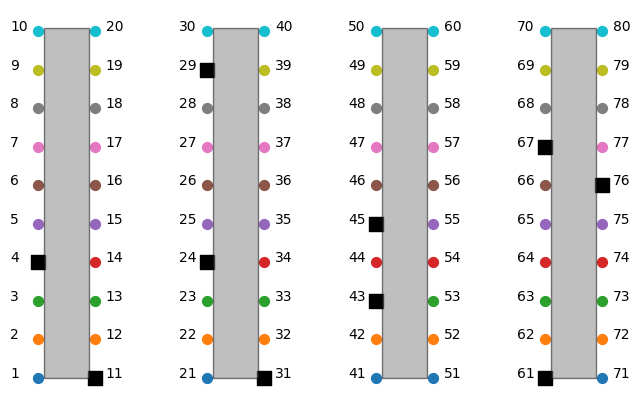

220


In [ ]:
X= [1, 2 , 4, 5, 7,8, 10,11]
org =1
Y = range(10)
plt.figure(figsize=(8,5))
counter = 0
pos = {}
for x in X:
  for y in Y:
    plt.scatter(x,y,s=50)
    counter+=1
    pos[counter]=(x,y)
plt.xticks(X)




nodes = [n for n in pos.keys()]
m = 10
filled= random.sample(nodes, m)
filled = [76, 4, 31, 11, 67, 24, 43, 61, 29, 45]

for n in filled:
    x1,y1 = pos[n][0],pos[n][1]
    plt.scatter(x1,y1,s=100, c='k', marker = 's')

allowed = []
for n in nodes:
  for m in nodes:
    con1 = n>m and pos[n][0]==pos[m][0] and abs(pos[n][1]-pos[m][1])==1
    con2 = n>m and abs (X.index(pos[n][0])-X.index(pos[m][0]))==1 and pos[m][1]== min(Y) and pos[n][1]== min(Y)
    con3 = n>m and abs (X.index(pos[n][0])-X.index(pos[m][0]))==1 and pos[m][1]== max(Y) and pos[n][1]== max(Y)
    con4 = n>m and abs(pos[n][0]-pos[m][0])==2 and pos[m][1]== pos[n][1]
    if con1 or con2 or con3 or con4:
      x1,y1 = pos[n][0],pos[n][1]
      x2,y2 = pos[m][0],pos[m][1]
      allowed.append((n,m))
      allowed.append((m,n))





# Create a rectangle patch



# Set the aspect of the plot to 'equal' to ensure the correct aspect ratio
#plt.gca().set_aspect('equal', adjustable='box')
rects()

allowed =list(set(allowed))
plt.axis('off')
plt.show()
print(len(allowed))

def dist(i,j,pos):
  return int(np.sqrt( (pos[i][0]-pos[j][0] )**2 + (pos[i][1]-pos[j][1] )**2 ) )

In [ ]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()

U = {(i,j):model.NewBoolVar(f"connection_{i}_{j}") for (i,j) in allowed}
select = {i:model.NewBoolVar(f"select_{i}") for i in nodes  }
U.update({(i,i):select[i].Not() for i in nodes  })

for i in filled:
  model.Add(select[i]==1)

model.Add(select[1]==1)

arcs = [(i,j,v) for (i,j),v in U.items() ]
model.AddCircuit(arcs)


# Minimize x
expressions = [v*dist(i,j,pos) for (i,j),v in U.items() ]
model.Minimize(sum(expressions))

status = solver.Solve(model)
if status == cp_model.FEASIBLE:
  print("feasible")
elif status == cp_model.OPTIMAL:
  print("optimal")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")



optimal


In [ ]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()

U = {(i,j):model.NewBoolVar(f"connection_{i}_{j}") for (i,j) in allowed}
select = {i:model.NewBoolVar(f"select_{i}") for i in nodes  }
U.update({(i,i):select[i].Not() for i in nodes  })
order_visit={i:model.NewIntVar(1,len(nodes), f"order_{i}") for i in nodes}



for i in filled:
  model.Add(select[i]==1)

model.Add(select[1]==1)
model.Add(order_visit[1]==1)

arcs = [(i,j,v) for (i,j),v in U.items() ]
model.AddCircuit(arcs)

for (i,j),v in U.items():
  if i!=j and j != org:
    model.Add(order_visit[i]<order_visit[j]).OnlyEnforceIf(v)
    model.Add(select[i]==1).OnlyEnforceIf(v)
    model.Add(select[j]==1).OnlyEnforceIf(v)

expressions_numbers = [order_visit[i] for i in nodes ]
model.AddAllDifferent(expressions_numbers)

o_list = [(45,31), (4,29)]
for (f,s) in o_list:
  model.Add(order_visit[f]<order_visit[s])

for n in nodes:
  model.Add(order_visit[n]<= sum(select[i] for i in nodes))

# Maximize x
expressions = [v*dist(i,j,pos) for (i,j),v in U.items() ]
model.Minimize(sum(expressions))

status = solver.Solve(model)
if status == cp_model.FEASIBLE:
  print("feasible")
elif status == cp_model.OPTIMAL:
  print("optimal")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")


optimal


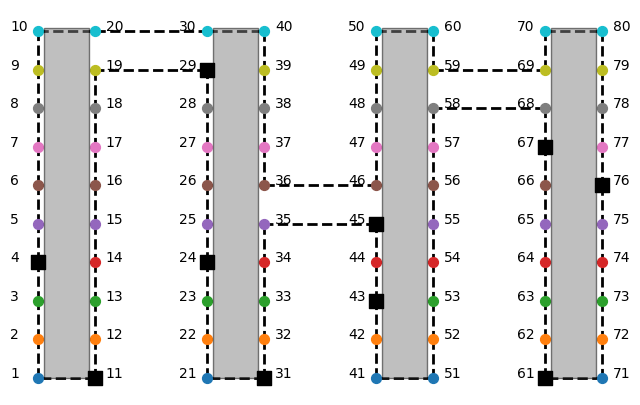

In [ ]:
plt.figure(figsize=(8,5))
counter = 0

for n in filled:
    x1,y1 = pos[n][0],pos[n][1]
    plt.scatter(x1,y1,s=100, c='k', marker = 's', zorder=2)
for x in X:
  for y in Y:
    plt.scatter(x,y,s=50)
    counter+=1
    pos[counter]=(x,y)

org = 1
start = 1
finish = 1000
rects()
plt.xticks(X)
plt.axis('off')
counter = 0
while finish !=org:
  for (n,m),v in U.items():
    if solver.Value(v)>0 and n==start:
        x1,y1 = pos[n][0],pos[n][1]
        x2,y2 = pos[m][0],pos[m][1]
        plt.plot([x1,x2],[y1,y2], '--',lw=2,c='k', zorder=-1)
        start = m
        finish = m
        counter+=1
        name = f"rectangle_{counter}.png"
        plt.savefig(f'/content/drive/My Drive/Colab Notebooks/img/rectangle_plot_{counter}.png')
        if finish == org:
          break

plt.show()
